# Feature Selection with sklearn and Pandas
## Introduction to Feature Selection methods and their implementation in Python

Author: Abhini Shetye

Article from [towardsdatascience](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b).

> Note: In this notebook, I am studying the article mentioned above. Some changes may have been made to the code during its implementation.

# Library

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

# Loading the Dataset

In [5]:
x = load_boston()
df = pd.DataFrame(x.data, columns=x.feature_names)
df['MEDV'] = x.target
X = df.drop('MEDV', 1) #Feature Matrix
y = df['MEDV'] #Target Variable
df.head()

/mnt/Dados/Mestrado_Computacao_Aplicada_UFMS/1_semestre/Inteligencia_Artificial/algoritmos-ia/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 1. Filter Method

## Using Pearson Correlation

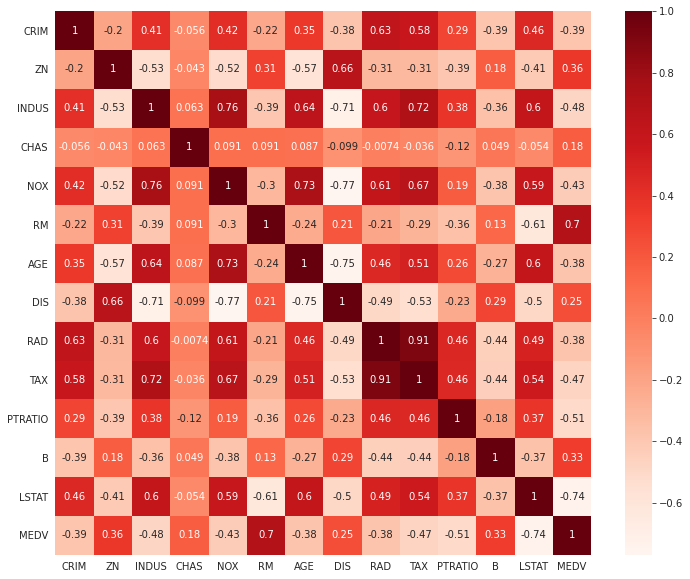

In [8]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Correlation with output variable

In [9]:
cor['MEDV']

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [10]:
cor_target = abs(cor['MEDV'])

## Selecting highly correlated features

In [11]:
relevant_features = cor_target[cor_target>0.5]
relevant_features

RM         0.695360
PTRATIO    0.507787
LSTAT      0.737663
MEDV       1.000000
Name: MEDV, dtype: float64

In [12]:
df[['LSTAT','PTRATIO']].corr()

,LSTAT,PTRATIO
LSTAT,1.000000,0.374044
PTRATIO,0.374044,1.000000


In [13]:
df[['RM','LSTAT']].corr()

,RM,LSTAT
RM,1.000000,-0.613808
LSTAT,-0.613808,1.000000


In [15]:
df[['PTRATIO','RM']].corr()

,PTRATIO,RM
PTRATIO,1.000000,-0.355501
RM,-0.355501,1.000000


# 2. Wrapper Method

## i. Backward Elimination

### Adding constant column of ones, madatory for sm.OLS model

In [17]:
X_1 = sm.add_constant(X)
X_1

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### Fitting sm.OLS model

In [18]:
model = sm.OLS(y, X_1).fit()
model.pvalues

const      3.283438e-12
CRIM       1.086810e-03
ZN         7.781097e-04
INDUS      7.382881e-01
CHAS       1.925030e-03
NOX        4.245644e-06
RM         1.979441e-18
AGE        9.582293e-01
DIS        6.013491e-13
RAD        5.070529e-06
TAX        1.111637e-03
PTRATIO    1.308835e-12
B          5.728592e-04
LSTAT      7.776912e-23
dtype: float64

### Backward Elimination

In [20]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index=cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.05):
        cols.remove(feature_with_p_max)
    else:
        break

selected_features_BE = cols
print(selected_features_BE)

['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


## ii. RFE (Recursive Feature Elimination)

In [21]:
model = LinearRegression()

### Initializing RFE model

In [23]:
rfe = RFE(model, n_features_to_select=7)

### Transforming data using RFE

In [24]:
X_rfe = rfe.fit_transform(X, y)

### Fitting the data to model

In [25]:
model.fit(X_rfe, y)
print(rfe.support_)
print(rfe.ranking_)

[False False False  True  True  True False  True  True False  True False
  True]
[2 4 3 1 1 1 7 1 1 5 1 6 1]


### No of features

In [27]:
nof_list = np.arange(1,13)
high_score = 0

### Variable to store the optimum features

In [29]:
nof = 0
score_list = []

for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    if (score > high_score):
        high_score = score
        nof = nof_list[n]

print('Optimum number of features: %d' %nof)
print('Score with %d features: %f' % (nof, high_score))

Optimum number of features: 10
Score with 10 features: 0.663581


In [30]:
cols = list(X.columns)
model = LinearRegression()

### Initializing RFE model

In [31]:
rfe = RFE(model, n_features_to_select=10)

### Transforming data using RFE

In [32]:
X_rfe = rfe.fit_transform(X, y)

### Fitting the data to model

In [33]:
model.fit(X_rfe, y)
temp = pd.Series(rfe.support_, index=cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO',
       'LSTAT'],
      dtype='object')


# 3. Embedded Method

In [34]:
reg = LassoCV()
reg.fit(X, y)
print('Best alpha using built-in LassoCV: %f' % reg.alpha_)
print('Best score using built-in LassoCV: %f' % reg.score(X, y))
coef = pd.Series(reg.coef_, index=X.columns)

Best alpha using built-in LassoCV: 0.724820
Best score using built-in LassoCV: 0.702444


In [35]:
print('Lasso picked ' + str(sum(coef != 0)) + ' variables and eliminated the other ' + str(sum(coef == 0)) + ' variables')

Lasso picked 10 variables and eliminated the other 3 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

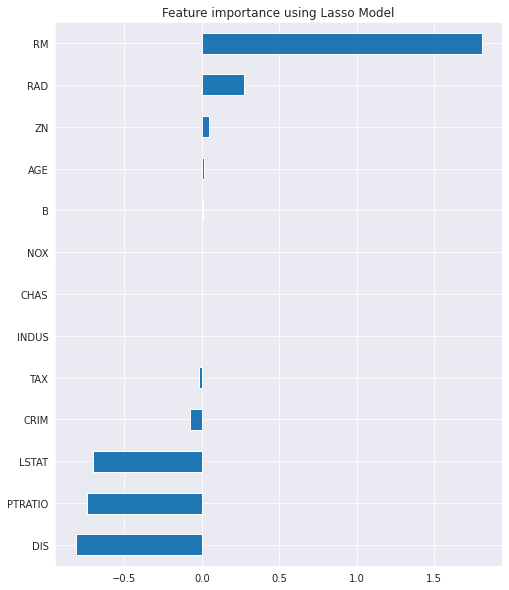

In [36]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind='barh')
plt.title('Feature importance using Lasso Model')